#**Importe de Librerías**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
import mpl_toolkits.mplot3d as plt3d
from IPython.display import HTML
import matplotlib.animation as pltani

#**PROBLEMA DE TRES CUERPOS RESTRINGIDO**

---



#**Sistema de Unidades**

Para simplificar un poco nuestros calculos y no provocar perdidas de precisión en la maquina al usar cifras muy grandes, debemos cambiar nuestras unidades convencionales de la siguiente manera.

La unidad de masa a utilizar será la suma de las masas de los cuerpos masivos $([M]=M_1 + M_2)$

La unidad de longitud corresponderá a la distancia que separe los cuerpos masivos $([L] = a)$

Para lograr que la constante $G$ tenga un valor $G=1$ debemos cambiar nuestra escala de tiempo a la siguiente: $[T]=375194.4911005963s$

In [3]:
1#Masas
m_tierra = 5.972e24 #Kg
m_luna = 7.349e22 #Kg
unidad_masa = m_tierra + m_luna
M1 = m_tierra/unidad_masa
M2 = m_luna/unidad_masa

#Distancia
a = 3.844e8 #Metros

#Tiempo
G = 6.6743e-11
unidad_tiempo = np.sqrt((a**3)/(G*unidad_masa))

#Constante G
G_modificado = 1

#**Movimiento de dos Cuerpos**

A partir de un sistema coordenado, definimos la el vector distancia $(\vec{r})$ entre dos cuerpos, los cuales se encuentran a una distancia $\vec{r_1}$ y $\vec{r_2}$ del origen.

$$\vec{r}=\vec{r_1}-\vec{r_2}$$

Sobre las dos masas, actua una fuerza gravitacional.

$$M_1\ddot{r_1}=\frac{GM_1M_2}{\|\vec{r}\|^2}\hat{r}$$

$$M_2\ddot{r_2}=-\frac{GM_1M_2}{\|\vec{r}\|^2}\hat{r}$$

Definimos el movimiento de $\vec{r}$ a través de su aceleración $(\ddot{r})$

$$\ddot{r} = \ddot{r_1}-\ddot{r_2}$$

$$\ddot{r_1}-\ddot{r_2} = \frac{GM_1M_2}{\|\vec{r}\|^2}\bigg(\frac{1}{M_1}+\frac{1}{M_2}\bigg)\hat{r}$$

A través de la masa reducida, $\mu$, podemos reducir el sistema de dos cuerpos, al movimiento de un solo cuerpo.

$$\mu=\frac{M_1M_2}{M_1+M_2}$$

$$\mu\ddot{r}=\frac{GM_1M_2}{\|\vec{r}\|^2}\hat{r}$$

#**Movimiento Circular de los dos Cuerpos**

Una de las condiciones necesarias para resolver el problema de los tres cuerpos, es que los cuerpos de mayor masa se encuentren en orbita circular entre ellos. Para ello se establece el movimiento circular entre ellos através de la aceleración centripeta $(a_c=\omega^2a)$ donde $a$ es la distancia que separa los dos cuerpos.

$$\mu\ddot{r}=\mu \omega^2a$$

$$\mu \omega^2 a = \frac{GM_1M_2}{a^2}$$

La velocidad a la que se orbitan los cuerpos es $\omega$.

$$\omega^2=\frac{G(M_1+M_2)}{a^3}$$

Con nuestro sistema de unidades, $\omega^2 = 1$

#**Nuevo Sistema Coordenado**

Si deseamos que el origen de nuestro sistema coordenado sea el centro de masa, entonces debemos conocer primero la posición del centro de masa, $\vec{r_{cm}}$.

$$\vec{r_{cm}}=\frac{M_1\vec{r_1}+M_2\vec{r_2}}{M_1+M_2}$$

Podemos reescribir las posiciones de los cuerpos en terminos del centro de masa a las siguientes expresiones.

$$\vec{r_1}=\vec{r_{cm}}+\frac{M_2}{M_1+M_2}\vec{r}$$

$$\vec{r_2}=\vec{r_{cm}}-\frac{M_1}{M_1+M_2}\vec{r}$$

Si el origen de nuestro sistema concuerda con el centro de masa, entonces las posiciones de nuestros cuerpos son.

$$\vec{r_1}=\frac{M_2}{M_1+M_2}\vec{r}$$

$$\vec{r_2}=-\frac{M_1}{M_1+M_2}\vec{r}$$

Haremos coincidir nuestro vector $\vec{r}$ con el eje $x$ de modo que los cuerpos se encuentren a alturas $y=0$ y se encuentren solamente a lo largo del eje $x$.

Para simplificar el problema, fijaremos nuestros dos cuerpos sobre el eje $x$ de nuestro nuevo sistema coordenado; es decir, que el vector $\vec{r}$ se encontrará sobre el eje $x$. Para ello debemos realizar ciertas transformaciones debido a que nos encontraremos ahora sobre un *Sistema No-Inercial Rotante*.

Determinemos las posiciones los dos cuerpos así.

$$\vec{r_1}=\frac{M_2}{M_1+M_2}a\hat{x}$$

$$\vec{r_2}=-\frac{M_1}{M_1+M_2}a\hat{x}$$

In [4]:
#Coordenadas de las particulas en el sistema rotante
e1 = M2
e2 = e1 - 1

#**El Tercer Cuerpo**

Introduciendo nuestro tercer cuerpo (el cual es de masa despreciable respecto a los otros cuerpos), este será el único cuerpo que se moverá a través del plano formado. Llamemos $\vec{r}$ al vector posición del tercer cuerpo respecto al origen. Las fuerzas que actúan sobre este nuevo cuerpo son

$$m\ddot{r}=F_1+F_2=-\frac{GM_1m}{\|\vec{r}-\vec{r_1}\|^2} - \frac{GM_2m}{\|\vec{r}-\vec{r_2}\|^2}$$

Esta expresión es valida únicamente sobre un sistema inercial, por lo que al encontrarnos en un *Sistema No-Inercial Rotante*, debemos realizar una transformación a la *Segunda Ley de Newton* (Si desea detallar la demostración de esta transformación, consulte el siguiente archivo: )

Para hacer consistente la ecuación de movimiento del cuerpo, debemos agregar el efecto de fuerzas ficticias que aparecen. Estas fuerzas son las denominadas *Fuerza Centrifuga* y *Fuerza de Coriolis*.

$$F_{centrifuga} = m\vec{\omega}\times(\vec{\omega}\times\vec{r}) = -m\omega^2x\hat{x} -m\omega^2y\hat{y}$$

$$F_{coriolis}=2m\vec{\omega}\times\frac{d\vec{r}}{dt} = -2m\omega \dot{y}\hat{x}+2m\omega\dot{x}\hat{y}$$

$$\vec{\omega}=\omega\hat{z}=\sqrt{\frac{G(M_1+M_2)}{a^3}}\hat{z}$$

Ahora bien, las fuerzas que actuan sobre el tercer cuerpo son:

$$m\ddot{r}=\frac{GM_1m}{\|\vec{r}-\vec{r_1}\|^2}(\hat{\vec{r}-\vec{r_1}}) - \frac{GM_2m}{\|\vec{r}-\vec{r_2}\|^2}(\hat{\vec{r}-\vec{r_2}}) - m\vec{\omega}\times(\vec{\omega}\times\vec{r})-2m\vec{\omega}\times\frac{d\vec{r}}{dt}$$

Si resolvemos algebraicamente para cada una de las componentes obtenemos las ecuaciones de movimiento mostradas a continuación.

$$\ddot{x}=\frac{GM_1(x-x_1)}{[(x-x_1)^2+y^2]^{3/2}}-\frac{GM_2(x-x_2)}{[(x-x_2)^2+y^2]^{3/2}}+\omega^2x +2\omega\dot{y}$$

$$\ddot{y}=\frac{GM_1y}{[(x-x_1)^2+y^2]^{3/2}}-\frac{GM_2y}{[(x-x_2)^2+y^2]^{3/2}}+\omega^2y-2\omega\dot{x}$$

In [5]:
m = 1e-20

#**Analisis del Potencial**

Resolviendo el rotacional del campo vectorial de $F_{centrifuga}$, notamos que tiene un rotacional igual a cero.

$$\vec{\nabla}\times \vec{F_{centrifuga}}= \begin{equation}
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k}\\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
m\omega^2 x & m\omega^2y & 0
\end{vmatrix}
\end{equation} = \vec{0}$$

Esto nos permite reescribir $F_{centrifuga}$ en terminos de un campo escalar denominado *Energia Potencial* $(U_{centrifugo})$

$$\vec{F_{centrifuga}}=-\vec{\nabla}U_{centrifugo}$$

$$U_{centrifugo}=-\frac{1}{2}m\omega^2(x^2+y^2)$$

Analizando ahora $F_{coriolis}$ se observa que $F_{coriolis}\perp\dot{r}$ y por tanto no realiza trabajo alguno $(W_{coriolis}=0)$

Podemos definir ahora un *Potencial Efectivo* sabiendo que $V=\frac{U}{m}$

$$V=V_{Gravitacional}+V_{Centrifrugo}$$

$$V=-\frac{GM_1}{[(x-x_1)^2+y^2]^{1/2}}-\frac{GM_2}{[(x-x_2)^2+y^2]^{1/2}}-\frac{1}{2}\omega^2(x^2+y^2)$$

Podemos simplificar un poco la expresión del *Potencial* de la siguiente forma

$$V(x,y)=\frac{G(M_1 + M_2)}{a}\bigg(\frac{x_2}{[(x-x_1)^2+y^2]^{1/2}}-\frac{x_1}{[(x-x_2)^2+y^2]^{1/2}}-\frac{1}{2a^2}(x^2+y^2)\bigg)$$

Bajo el sistema de unidades que manejamos, el termino $\frac{G(M_1 + M_2)}{a} = 1$

#**Puntos de Lagrange**

Los puntos de Lagrange son puntos de estabilidad en los cuales, si se coloca un cuerpo a orbitar en ellos, no presentará movimiento relativo respecto a los otros cuerpos. Para un sistema de dos cuerpos masivos, se generan $5$ posiciones donde se logra la estabilidad $(L_1,L_2,L_3,L_4,L_5)$

Estos puntos son deducidos a través del análisis del *Potencial Efectivo* en tanto matematicamente pueden expresarse así.

$$\{(x,y)|\frac{\partial V}{\partial x}\wedge \frac{\partial V}{\partial y} = 0\}$$

Conviene ahora, por simplicidad en los calculos, realizar un cambio de variable que tiene el beneficio de no lidiar con las unidades utilizadas. Este cambio de variable se realiza tanto para $x$ como para $y$.

$$x=\xi a \hspace{1cm} x_1=\xi_1a=\frac{M_2}{M_1+M_2} \hspace{1cm} x_2=\xi_2 a=\xi_1 -1=-\frac{M_1}{M_1+M_2}$$
$$y=\eta a$$

La expresión resultante de $V(\xi,\eta)$ es

$$V(\xi,\eta)=\frac{G(M_1 + M_2)}{a}\bigg(\frac{\xi_2}{[(\xi-\xi_1)^2+\eta^2]^{1/2}}-\frac{\xi_1}{[(\xi-\xi_2)^2+\eta^2]^{1/2}}-\frac{1}{2}(\xi^2+\eta^2)\bigg)$$

Analizando los puntos criticos de $V$ en función de $\xi$ y $\eta$, obtenemos las siguientes expresiones

$$\frac{\partial V}{\partial \xi}=\frac{G(M_1 + M_2)}{a}\bigg(-\frac{\xi_2(\xi-\xi_1)}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1(\xi-\xi_2)}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\xi\bigg)$$

$$\frac{\partial V}{\partial \eta}=\frac{G(M_1 + M_2)}{a}\bigg(-\frac{\xi_2\eta}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1\eta}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\eta\bigg)$$

Analizando los puntos criticos donde $\frac{\partial V}{\partial \xi}\wedge \frac{\partial V}{\partial \eta} = 0$

$$-\frac{\xi_2(\xi-\xi_1)}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1(\xi-\xi_2)}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\xi=0$$

$$-\frac{\xi_2\eta}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1\eta}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\eta=0$$

In [ ]:
def potencial_efectivo(e,n):
  return (e2/np.sqrt((e - e1)**2 + n**2)) - (e1/np.sqrt((e - e2)**2 + n**2)) - ((e**2 + n**2)*0.5)

In [ ]:
e = np.linspace(-1.5,1.5,600)
n = np.linspace(-1.5,1.5,600)
E, N = np.meshgrid(e,n)
V = potencial_efectivo(E, N)

#**Puntos $L_1, L_2, L_3$**

De $\frac{\partial V}{\partial \eta}$ se deduce que $\eta=0$ por tanto $\frac{\partial V}{\partial \xi}(\xi,0)$ se reduce a lo siguiente.

$$-\frac{\xi_2(\xi-\xi_1)}{|\xi-\xi_1|^3}+\frac{\xi_1(\xi-\xi_2)}{|\xi-\xi_2|^3}-\xi=0$$

Solucionando las raices de esta expresión se obtienen los puntos $L_1, L_2$ y $L_3$ que se encuentran sobre la recta que une a los dos cuerpos masivos

$$(\xi_{L_1},0),(\xi_{L_2},0),(\xi_{L_3},0)$$

En nuestras coordenadas comunes $(x,y)$, los puntos son

$$(x_{L_1},x_{L_2},x_{L_3})=(a\xi_{L_1},a\xi_{L_2},a\xi_{L_3})$$

$$(y_{L_1},y_{L_2},y_{L_3})=0$$

In [6]:
def puntos_criticos_potencial(e):
  return (-e2*(e - e1)/np.abs(e - e1)**3) + (e1*(e - e2)/np.abs(e - e2)**3) - e

In [7]:
def secante(f, p0, p1, resolucion):
  i = 0
  while (np.abs(p1-p0)) > resolucion:
    pn = p1 - ((f(p1)*(p1-p0))/(f(p1)-f(p0)))
    p0 = p1
    p1 = pn
    i += 1
  return pn, f(pn), i

In [8]:
e_L1 = secante(puntos_criticos_potencial, -0.9, -0.75, 1e-10)
e_L2 = secante(puntos_criticos_potencial, -1.25, -1, 1e-10)
e_L3 = secante(puntos_criticos_potencial, 0.9, 1.1, 1e-10)

In [ ]:
potencial_L1 = potencial_efectivo(e_L1[0], 0)
potencial_L2 = potencial_efectivo(e_L2[0], 0)
potencial_L3 = potencial_efectivo(e_L3[0], 0)

In [ ]:
pd.DataFrame(list(zip(e_L1, e_L2, e_L3)), columns = ["L1", "L2", "L3"], index = ["ξ","V(ξ,0)","i"])

,L1,L2,L3
ξ,-8.368877e-01,-1.155704e+00,1.005065e+00
"V(ξ,0)",2.220446e-16,4.440892e-16,-2.220446e-16
i,8.000000e+00,1.000000e+01,6.000000e+00


Text(0, 0.5, '$V(\\xi ,0)$')

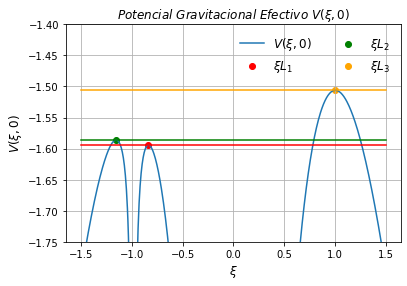

In [ ]:
plt.plot(e,potencial_efectivo(e,0), label = "$V(\\xi ,0)$")
plt.plot(e, np.full(len(e),potencial_efectivo(e_L1[0],0)), color = "r")
plt.plot(e, np.full(len(e),potencial_efectivo(e_L2[0],0)), color = "g")
plt.plot(e, np.full(len(e),potencial_efectivo(e_L3[0],0)), color = "orange")
plt.scatter(e_L1[0], potencial_efectivo(e_L1[0],0), color = "r", label = "$\\xi L_1$")
plt.scatter(e_L2[0], potencial_efectivo(e_L2[0],0), color = "g", label = "$\\xi L_2$")
plt.scatter(e_L3[0], potencial_efectivo(e_L3[0],0), color = "orange", label = "$\\xi L_3$")
plt.ylim(-1.75,-1.4)
plt.grid()
plt.legend(fontsize = 12, framealpha = 0, ncol = 2)
plt.title("Potencial Gravitacional Efectivo $V(\\xi , 0)$", fontstyle = "italic", fontsize = 12)
plt.xlabel("$\\xi$", fontsize = 12)
plt.ylabel("$V(\\xi ,0)$", fontsize = 12)

Text(0, 0.5, '$\\frac{\\partial V}{\\partial \\xi}(\\xi,0)$')

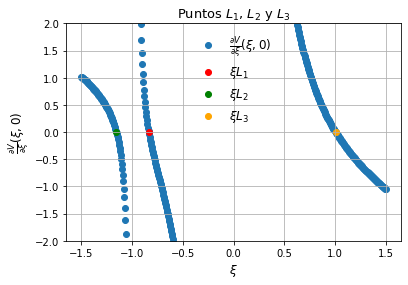

In [ ]:
plt.scatter(e, puntos_criticos_potencial(e), label = "$\\frac{\\partial V}{\\partial \\xi}(\\xi,0)$")
plt.scatter(e_L1[0], e_L1[1], label = "$\\xi L_1$", color = "r")
plt.scatter(e_L2[0], e_L2[1], label = "$\\xi L_2$", color = "g")
plt.scatter(e_L3[0], e_L3[1], label = "$\\xi L_3$", color = "orange")
plt.ylim(-2,2)
plt.grid()
plt.legend(fontsize = 12, loc = "upper center", framealpha = 0)
plt.title("Puntos $L_1$, $L_2$ y $L_3$", fontsize = 13)
plt.xlabel("$\\xi$", fontsize = 12)
plt.ylabel("$\\frac{\\partial V}{\\partial \\xi}(\\xi,0)$", fontsize = 12)

#**Puntos $L_4, L_5$**

A partir de $\frac{\partial V}{\partial \xi}\wedge\frac{\partial V}{\partial \eta}$ podemos crear un sistema de ecuaciones $2\times 2$, el cual puede reducirse para simplificar las expresiones.

$$\begin{vmatrix}
-\frac{\xi_2(\xi-\xi_1)}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}&\frac{\xi_1(\xi-\xi_2)}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}\\
-\frac{\xi_2}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}& \frac{\xi_1}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}
\end{vmatrix}=
\begin{vmatrix}
\xi\\
1
\end{vmatrix} $$

Esta matriz puede reducirse a una más sencilla de operar para encontrar las soluciones a $\xi$ y $\eta$

$$\begin{vmatrix}
(\xi-\xi_1)^2 & \eta^2\\
(\xi-\xi_2)^2 &\eta^2
\end{vmatrix} = \begin{vmatrix}
1\\
1
\end{vmatrix}$$

La solución respectiva luego de resolver la matriz es

$$\begin{vmatrix}
\xi\\
\eta
\end{vmatrix}=\begin{vmatrix}
\xi_1-\frac{1}{2}\\
\pm\frac{\sqrt{3}}{2}
\end{vmatrix}$$

Estos ultimos conjuntos de coordenadas corresponden a los puntos $L_4$ y $L_5$

$$(\xi_{L_4},\eta_{L_4})=(\xi_1-\frac{1}{2},\frac{\sqrt{3}}{2})$$

$$(\xi_{L_5},\eta_{L_5})=(\xi_1-\frac{1}{2},-\frac{\sqrt{3}}{2})$$

De este modo, las coordenadas $(x,y)$ de los puntos $L_4$ y $L_5$ son

$$(x_{L_4},y_{L_4})=x_1-\frac{a}{2},\frac{a\sqrt{3}}{2}$$

$$(x_{L_5},y_{L_5})=x_1-\frac{a}{2},-\frac{a\sqrt{3}}{2}$$

In [9]:
e_L4 = e1 - 0.5
n_L4 = np.sqrt(3)*0.5
e_L5 = e_L4
n_L5 = -n_L4

In [ ]:
def n_L4_L5(e):
  return np.sqrt(1 - (e-e1)**2) - np.sqrt(1 - (e-e2)**2)

In [ ]:
secante(n_L4_L5,-0.5, -0.46, 1e-10)

(-0.4878438306903163, 0.0, 4)

In [ ]:
potencial_L4 = potencial_efectivo(e_L4, n_L4)
potencial_L5 = potencial_efectivo(e_L5, n_L5)

In [ ]:
pd.DataFrame(list(zip([e_L4, e_L5],[n_L4, n_L5],[potencial_efectivo(e_L4,n_L4)]*2)), columns = ["ξ","𝜂","V(ξ,𝜂)"], index = ["L4","L5"])

,ξ,𝜂,"V(ξ,𝜂)"
L4,-0.487844,0.866025,-1.493996
L5,-0.487844,-0.866025,-1.493996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


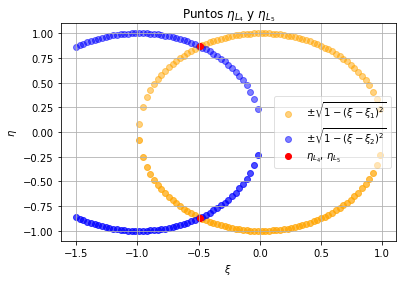

In [ ]:
n4 = np.sqrt(1 - (e-e1)**2)
n5 = np.sqrt(1 - (e-e2)**2)
plt.scatter(e, n4, label = "$\\pm \\sqrt{1-(\\xi-\\xi_1)^2}$", color = "orange", alpha = 0.5)
plt.scatter(e, n5, label = "$\\pm \\sqrt{1-(\\xi-\\xi_2)^2}$", color = "blue", alpha = 0.5)
plt.scatter(e, -n4, color = "orange", alpha = 0.7)
plt.scatter(e, -n5, color = "blue", alpha = 0.7)
plt.scatter(e_L4, n_L4, color = "r", label = "$\\eta_{L_4}$, $\\eta_{L_5}$")
plt.scatter(e_L4, n_L5, color = "r")
plt.grid()
plt.legend(framealpha = 0.6)
plt.title("Puntos $\\eta_{L_4}$ y $\\eta_{L_5}$")
plt.xlabel("$\\xi$")
plt.ylabel("$\\eta$")

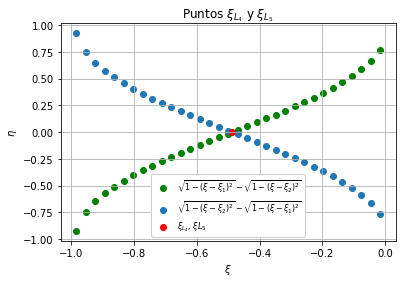

In [ ]:
plt.scatter(e, n4-n5, label = "$\\sqrt{1-(\\xi-\\xi_1)^2} - \\sqrt{1-(\\xi-\\xi_2)^2}$", color = "green")
plt.scatter(e, n5-n4, label = "$\\sqrt{1-(\\xi-\\xi_2)^2} - \\sqrt{1-(\\xi-\\xi_1)^2}$")
plt.scatter(e_L4, 0, label = "$\\xi_{L_4}$, $\\xi{L_5}$", color = "r")
plt.grid()
plt.legend(framealpha = 1, loc = "lower center", prop = {"size": 8})
plt.title("Puntos $\\xi_{L_4}$ y $\\xi_{L_5}$")
plt.xlabel("$\\xi$")
plt.ylabel("$\\eta$")

#**Animaciones y Graficos**

(-1.5, 1.5, -1.5, 1.5)

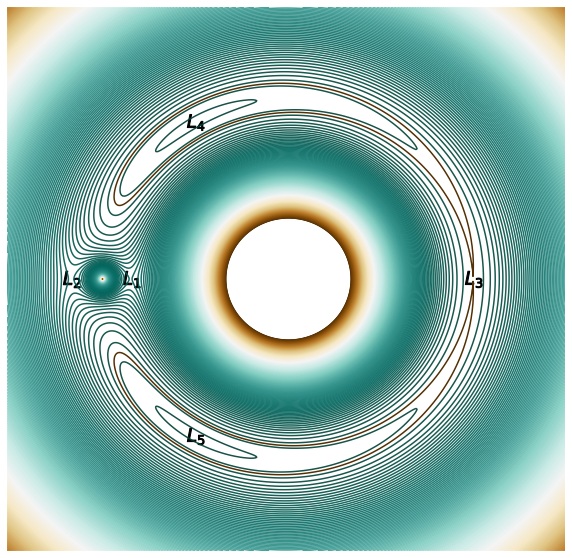

In [ ]:
plt.figure(figsize=(10,10))
plt.contour(E, N, V, levels = np.linspace(-3,-1.48,200), cmap = "BrBG", alpha = 0.9)
plt.contour(E, N, V, levels = np.array([potencial_L3]), cmap = "BrBG")
plt.scatter(e_L1[0], 0, marker = "$L_1$", s = 300, color = "black")
plt.scatter(e_L2[0], 0, marker = "$L_2$", s = 300, color = "black")
plt.scatter(e_L3[0],0, marker = "$L_3$", s = 300, color = "black")
plt.scatter(e_L4,n_L4, marker = "$L_4$", s = 300, color = "black")
plt.scatter(e_L5,n_L5, marker = "$L_5$", s = 300, color = "black")
plt.axis("off")

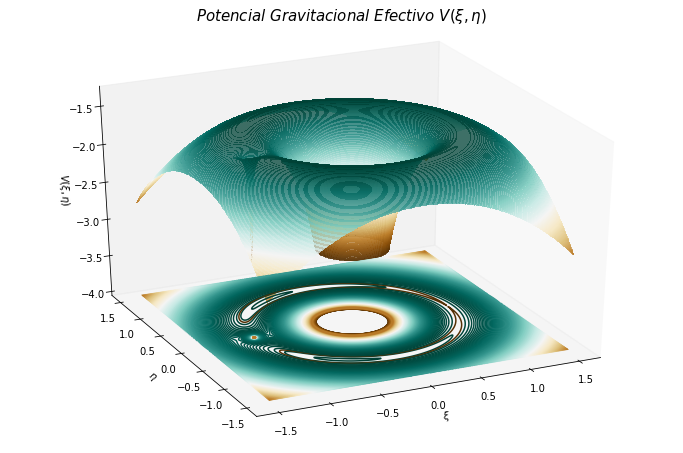

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d', )
ax.set_title("Potencial Gravitacional Efectivo $V(\\xi , \\eta)$\n", fontstyle = "italic", fontsize = 15)
ax.contourf(E,N,V, zdir='z', levels = np.linspace(-3,-1.48,200), cmap = "BrBG", alpha = 0.75)
ax.contour(E,N,V, zdir='z', levels = np.linspace(-3,-1.48,200), offset = -4, cmap = "BrBG")
ax.contour(E, N, V, levels = np.array([potencial_L3]), offset = -4, cmap = "BrBG")
ax.set_zlim3d(-4, -1.3)
ax.view_init(30,-115)
ax.set_xlabel("$\\xi$")
ax.set_ylabel("$\\eta$")
ax.set_zlabel("$V(\\xi, \\eta)$")
ax.grid(False)

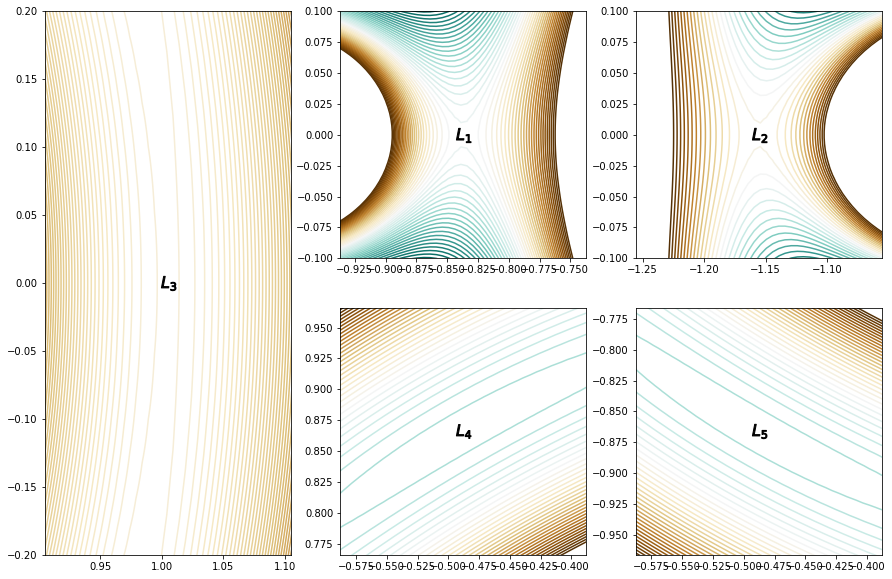

In [ ]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(131)
ax1.contour(E, N, V, levels = np.arange(-1.55,-1.45,0.0006), cmap = "BrBG")
ax1.plot(e_L3[0],0, marker = "$L_3$", markersize = 15, color = "black")
ax1.set_xlim(e_L3[0]-0.1, e_L3[0]+0.1)
ax1.set_ylim(-0.2,0.2)
ax2 = fig.add_subplot(232)
ax2.contour(E, N, V, levels = np.arange(-1.62,-1.57,0.001), cmap = "BrBG")
ax2.plot(e_L1[0],0, marker = "$L_1$", markersize = 15, color = "black")
ax2.set_xlim(e_L1[0]-0.1, e_L1[0]+0.1)
ax2.set_ylim(-0.1,0.1)
ax3 = fig.add_subplot(233)
ax3.contour(E, N, V, levels = np.arange(-1.6,-1.57,0.001), cmap = "BrBG")
ax3.plot(e_L2[0],0, marker = "$L_2$", markersize = 15, color = "black")
ax3.set_xlim(e_L2[0]-0.1, e_L2[0]+0.1)
ax3.set_ylim(-0.1,0.1)
ax4 = fig.add_subplot(235)
ax4.contour(E, N, V, levels = np.arange(-1.52,-1.48,0.0008), cmap = "BrBG")
ax4.plot(e_L4,n_L4, marker = "$L_4$", markersize = 15, color = "black")
ax4.set_xlim(e_L4-0.1, e_L4+0.1)
ax4.set_ylim(n_L4-0.1,n_L4+0.1)
ax5 = fig.add_subplot(236)
ax5.contour(E, N, V, levels = np.arange(-1.52,-1.48,0.0008), cmap = "BrBG")
ax5.plot(e_L5,n_L5, marker = "$L_5$", markersize = 15, color = "black")
ax5.set_xlim(e_L5-0.1, e_L5+0.1)
ax5.set_ylim(n_L5-0.1,n_L5+0.1)
plt.savefig("2.png")

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

def init():
  ax.set_title("Potencial Gravitacional Efectivo $V(\\xi , \\eta)$\n", fontstyle = "italic", fontsize = 15)
  ax.contourf(E,N,V, zdir='z', levels = np.linspace(-3,-1.48,200), cmap = "BrBG", alpha = 0.75)
  ax.contour(E,N,V, zdir='z', levels = np.linspace(-3,-1.48,200), offset = -4, cmap = "BrBG")
  ax.contour(E, N, V, levels = np.array([potencial_L3]), offset = -4, cmap = "BrBG")
  ax.set_zlim3d(-4, -1.3)
  ax.set_xlabel("$\\xi$")
  ax.set_ylabel("$\\eta$")
  ax.set_zlabel("$V(\\xi, \\eta)$")
  ax.grid(False)
  return fig,

def animate(i):
  ax.view_init(elev=30, azim = 3.6*i)
  return fig,

ani = pltani.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)    
HTML(ani.to_html5_video())

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

def init():
  ax.contour(E,N,V, zdir='z', levels = np.linspace(-3,-1.48,200), cmap = "BrBG")
  ax.contour(E, N, V, levels = np.array([potencial_L3]), offset = -4, cmap = "BrBG")
  ax.scatter(e_L1[0], 0, 0, marker = "$L_1$", s = 100, color = "black")
  ax.scatter(e_L2[0], 0, 0, marker = "$L_2$", s = 100, color = "black")
  ax.scatter(e_L3[0],0,0, marker = "$L_3$", s = 100, color = "black")
  ax.scatter(e_L4,n_L4,0, marker = "$L_4$", s = 100, color = "black")
  ax.scatter(e_L5,n_L5,0, marker = "$L_5$", s = 100, color = "black")
  ax.set_xlabel("$\\xi$")
  ax.set_ylabel("$\\eta$")
  ax.grid(False)
  ax.set_axis_off()
  return fig,

def animate(i):
  ax.view_init(elev = 90, azim = 3.6*i)
  return fig,

ani = pltani.FuncAnimation(fig, animate, init_func=init, frames = 200, interval=100, blit=True)    
HTML(ani.to_html5_video())

#**Naturaleza de los Puntos**

Recordemos las expresiones con las que determinamos los puntos criticos del potencial.

$$\frac{\partial V}{\partial \xi}=\frac{G(M_1 + M_2)}{a}\bigg(-\frac{\xi_2(\xi-\xi_1)}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1(\xi-\xi_2)}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\xi\bigg)$$

$$\frac{\partial V}{\partial \eta}=\frac{G(M_1 + M_2)}{a}\bigg(-\frac{\xi_2\eta}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}+\frac{\xi_1\eta}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}-\eta\bigg)$$

Para conocer las naturalezas de los *Puntos de Lagrange* y su estabilidad, debemos conocer las segundas derivadas parciales.

$$\frac{\partial^2 V}{\partial \xi^2}(\xi,\eta)\hspace{1cm}\frac{\partial^2 V}{\partial \eta^2}(\xi,\eta)\hspace{1cm}\frac{\partial^2 V}{\partial \xi\partial \eta}(\xi,\eta)\hspace{1cm}\frac{\partial^2 V}{\partial\eta \partial \xi}(\xi,\eta)$$

Luego, con base en el criterio del *Determinante Hessiano* conoceremos la naturaleza de los puntos

$$\det H_f(\xi,\eta)=\frac{\partial ^2V}{\partial \xi^2}(\xi,\eta)\frac{\partial ^2V}{\partial \eta^2}(\xi,\eta)-\frac{\partial ^2V}{\partial \xi \partial \eta}(\xi,\eta)\frac{\partial ^2V}{\partial \eta \partial \xi}(\xi,\eta)$$

>Si $\det H_f(\xi,\eta) < 0$ el punto $(\xi,\eta)$ se considera *Punto de silla*.

>Si $\det H_f(\xi,\eta) > 0\hspace{0.5cm}\wedge \hspace{0.5cm}[\frac{\partial ^2V}{\partial \xi^2}(\xi,\eta) \lor \frac{\partial ^2V}{\partial \eta^2}(\xi,\eta)]>0$ el punto $(\xi,\eta)$ se considera *Punto Minimo*.

>Si $\det H_f(\xi,\eta) > 0\hspace{0.5cm}\wedge \hspace{0.5cm}[\frac{\partial ^2V}{\partial \xi^2}(\xi,\eta) \lor \frac{\partial ^2V}{\partial \eta^2}(\xi,\eta)] < 0$ el punto $(\xi,\eta)$ se considera *Punto Maximo*.

In [10]:
e_puntos = np.array([e_L1[0], e_L2[0], e_L3[0], e_L4, e_L5])
n_puntos = np.array([0, 0, 0, n_L4, n_L5])

In [ ]:
def parcial_e(e, n):
  return (e1*(e-e2)/(np.sqrt((e-e2)**2 + n**2)**3)) - (e2*(e-e1)/(np.sqrt((e-e1)**2 + n**2)**3)) - e

def parcial_n(e, n):
  return (e1*n/(np.sqrt((e-e2)**2 + n**2)**3)) - (e2*n/(np.sqrt((e-e1)**2 + n**2)**3)) - n

In [ ]:
def dif_central_e(f,e,n):
  h = 1e-10
  lim = (f(e+h, n) - f(e-h, n))/(2*h)
  return lim

def dif_central_n(f,e,n):
  h = 1e-10
  lim = (f(e,n+h) - f(e,n-h))/(2*h)
  return lim

In [ ]:
d2V_ee = np.zeros(5)
d2V_nn = np.zeros(5)
d2V_ne = np.zeros(5)
d2V_en = np.zeros(5)
for i in range(5):
  d2V_ee[i] = dif_central_e(parcial_e, e_puntos[i], n_puntos[i])
  d2V_nn[i] = dif_central_n(parcial_n, e_puntos[i], n_puntos[i])
  d2V_ne[i] = dif_central_e(parcial_n, e_puntos[i], n_puntos[i])
  d2V_en[i] = dif_central_n(parcial_e, e_puntos[i], n_puntos[i])

In [ ]:
hessiano = np.zeros(5)
for i in range(5):
  hessiano[i] = d2V_ee[i]*d2V_nn[i] - d2V_ne[i]*d2V_en[i]

In [ ]:
pd.DataFrame(list(zip(hessiano,["-","-","-",d2V_ee[3], d2V_ee[4]],["Silla","Silla","Silla","Maximo","Maximo"])), columns = ["H", "∂2V/∂ξ2", "Tipo"], index = ["L1","L2","L3","L4","L5"])

,H,∂2V/∂ξ2,Tipo
L1,-46.851821,-,Silla
L2,-16.165925,-,Silla
L3,-0.032317,-,Silla
L4,0.081057,-0.750001,Maximo
L5,0.081057,-0.750001,Maximo


#**Dinamica en los Puntos de Lagrange**

$$\ddot{r}=\frac{GM_1}{\|\vec{r}-\vec{r_1}\|^2}(\hat{\vec{r}-\vec{r_1}}) + \frac{GM_2}{\|\vec{r}-\vec{r_2}\|^2}(\hat{\vec{r}-\vec{r_2}}) - \vec{\omega}\times(\vec{\omega}\times\vec{r})-2\vec{\omega}\times\frac{d\vec{r}}{dt}$$

Recordando las expresiones obtenidas anteriormente, se describe el movimiento en cada una de las coordenadas del plano.

$$\ddot{x}=\frac{GM_1(x-x_1)}{[(x-x_1)^2+y^2]^{3/2}}-\frac{GM_2(x-x_2)}{[(x-x_2)^2+y^2]^{3/2}}+\omega^2x +2\omega\dot{y}$$

$$\ddot{y}=\frac{GM_1y}{[(x-x_1)^2+y^2]^{3/2}}-\frac{GM_2y}{[(x-x_2)^2+y^2]^{3/2}}+\omega^2y-2\omega\dot{x}$$

Si transformamos dichas expresiones al sistema $(\xi,\eta)$ obtenemos las ecuaciones de movimiento respectivas

$$\ddot{\xi}=\frac{G(M_1+M_2)}{a}\bigg(\frac{\xi_2(\xi - \xi_1)}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}-\frac{\xi_1(\xi - \xi_2)}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}\bigg)+\omega^2\xi +2\dot{\eta}\omega$$

$$\ddot{\eta}=\frac{G(M_1+M_2)}{a}\bigg(\frac{\xi_2\eta}{[(\xi-\xi_1)^2+\eta^2]^{3/2}}-\frac{\xi_1\eta}{[(\xi-\xi_2)^2+\eta^2]^{3/2}}\bigg)+\omega^2\eta-2\dot{\xi}\omega$$

In [11]:
def g0(e, n, ve, vn, t):
  return ve
def g1(e, n, ve, vn, t):
  return e + (2*vn) + (e2*(e-e1)/np.sqrt(((e-e1)**2 + n**2)**3)) - (e1*(e-e2)/np.sqrt(((e-e2)**2 + n**2)**3))
def g2(e, n, ve, vn, t):
  return vn
def g3(e, n, ve, vn, t):
  return n + (e2*n/np.sqrt(((e-e1)**2 + n**2)**3)) - (e1*n/np.sqrt(((e-e2)**2 + n**2)**3)) - (2*ve)

In [12]:
def RK4(f, y, t, dt):
  k1 = dt*f(y,t)
  k2 = dt*f(y + 0.5*k1, t + 0.5*dt)
  k3 = dt*f(y + 0.5*k2, t + 0.5*dt)
  k4 = dt*f(y + k3, t + dt)
  return y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

In [13]:
def integrador(y, t):
  e = y[:,0]
  ve = y[:,1]
  n = y[:,2]
  vn = y[:,3]

  de = g0(e, n, ve, vn, t)
  dve = g1(e, n, ve, vn, t)
  dn = g2(e, n, ve, vn, t)
  dvn = g3(e, n, ve, vn, t)

  f = np.c_[de, dve, dn, dvn]
  return f

In [ ]:
dt = 2*np.pi/(1440)
t = np.arange(0, 27*np.pi + dt, dt)

e_pos = np.zeros((5,len(t)))
n_pos = np.zeros((5,len(t)))
ve = np.zeros((5,len(t)))
vn = np.zeros((5,len(t)))
e_pos[:,0] = e_puntos
n_pos[:,0] = n_puntos

y = np.c_[e_pos[:,0], ve[:,0], n_pos[:,0], vn[:,0]]

#Implementación Runge - Kutta
for i in range(len(t)-1):
  y = RK4(integrador, y, t[i], dt)
  e_pos[:,i+1] = y[:,0]
  ve[:,i+1] = y[:,1]
  n_pos[:,i+1] = y[:,2]
  vn[:,i+1] = y[:,3]

In [ ]:
plt.scatter(e_pos[0],n_pos[0], marker = "$L_1$", s = 150, linewidths = 0.1)
plt.scatter(e_pos[1],n_pos[1], marker = "$L_2$", s = 150, linewidths = 0.1)
plt.scatter(e_pos[2],n_pos[2], marker = "$L_3$", s = 150, linewidths = 0.1)
plt.scatter(e_pos[3],n_pos[3], marker = "$L_4$", s = 150, linewidths = 0.1)
plt.scatter(e_pos[4],n_pos[4], marker = "$L_5$", s = 150, linewidths = 0.1)
plt.xlabel("$\\xi$ $(t)$")
plt.ylabel("$\\eta$ $(t)$")
plt.title("Posiciones $(\\xi, \\eta)$ en el tiempo")
plt.grid()

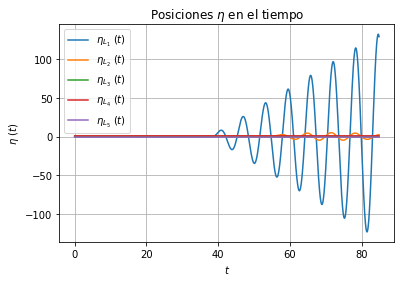

In [ ]:
plt.plot(t,n_pos[0], label = "$\\eta_{L_1}$ $(t)$")
plt.plot(t,n_pos[1], label = "$\\eta_{L_2}$ $(t)$")
plt.plot(t,n_pos[2], label = "$\\eta_{L_3}$ $(t)$")
plt.plot(t,n_pos[3], label = "$\\eta_{L_4}$ $(t)$")
plt.plot(t,n_pos[4], label = "$\\eta_{L_5}$ $(t)$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\\eta$ $(t)$")
plt.title("Posiciones $\\eta$ en el tiempo")
plt.grid()
#plt.savefig("eta.png")

(-0.5, -0.48)

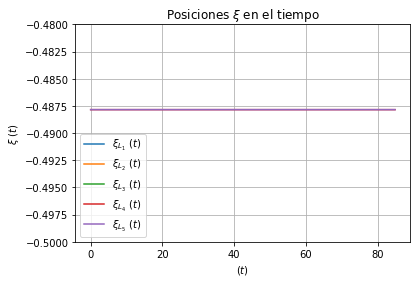

In [ ]:
plt.plot(t,e_pos[0], label = "$\\xi_{L_1}$ $(t)$")
plt.plot(t,e_pos[1], label = "$\\xi_{L_2}$ $(t)$")
plt.plot(t,e_pos[2], label = "$\\xi_{L_3}$ $(t)$")
plt.plot(t,e_pos[3], label = "$\\xi_{L_4}$ $(t)$")
plt.plot(t,e_pos[4], label = "$\\xi_{L_5}$ $(t)$")
plt.legend()
plt.xlabel("$(t)$")
plt.ylabel("$\\xi$ $(t)$")
plt.title("Posiciones $\\xi$ en el tiempo")
plt.grid()
#plt.savefig("xi.png")

#**Energía del Sistema**

Por último, podemos determinar la energía total del sistema, $E$, como la suma entre la enegía cinetica $(K)$ que tenga el tercer cuerpo junto con su energía potencial $(U)$.

$$K=\frac{a^2}{2}m(\dot{\xi}^2+\dot{\eta}^2)$$

$$U=Vm$$

$$E=K+U$$

$$E=\frac{a^2}{2}m(\dot{\xi}^2+\dot{\eta}^2)+\frac{G(M_1 + M_2)m}{a}\bigg(\frac{\xi_2}{[(\xi-\xi_1)^2+\eta^2]^{1/2}}-\frac{\xi_1}{[(\xi-\xi_2)^2+\eta^2]^{1/2}}-\frac{1}{2}(\xi^2+\eta^2)\bigg)$$

Notemos ahora lo siguiente...

$$\frac{dE}{dt}=0\to E=Cte$$

Esto quiere decir que la energía en el sistema se conserva a lo largo del tiempo y por tanto el movimiento se da a lo largo de un campo conservativo.

In [21]:
def energia(e,n,ve,vn,m):
  return 0.5*m*(ve**2 + vn**2) - m*(e1/np.sqrt((e - e2)**2 + n**2)) - m*((e**2 + n**2)*0.5) + m*(e2/np.sqrt((e - e1)**2 + n**2))

In [ ]:
En = energia(e_pos,n_pos,ve,vn,m)

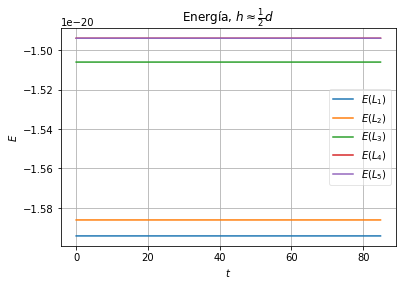

In [ ]:
plt.plot(t, En[0], label = "$E(L_1)$")
plt.plot(t, En[1], label = "$E(L_2)$")
plt.plot(t, En[2], label = "$E(L_3)$")
plt.plot(t, En[3], label = "$E(L_4)$")
plt.plot(t, En[4], label = "$E(L_5)$")
plt.legend(framealpha = 0.5)
plt.xlabel("$t$")
plt.ylabel("$E$")
plt.title("Energía, $h \\approx \\frac{1}{2}d$")
plt.grid()
plt.savefig("e.png")

#**Dinamica Especial**

In [94]:
def integrador(y, t):
  e = y[0]
  ve = y[1]
  n = y[2]
  vn = y[3]

  de = g0(e, n, ve, vn, t)
  dve = g1(e, n, ve, vn, t)
  dn = g2(e, n, ve, vn, t)
  dvn = g3(e, n, ve, vn, t)

  f = np.array([de, dve, dn, dvn])
  return f

In [187]:
dt = 2*np.pi/1440
t = np.arange(0, 7*np.pi + dt, dt)

e_pos = np.zeros(len(t))
n_pos = np.zeros(len(t))
ve = np.zeros(len(t))
vn = np.zeros(len(t))
e_pos[0] = e_puntos[0]
n_pos[0] = n_puntos[0]
ve[0] = 0.03424352 
vn[0] = -0.02000545

y = np.array([e_pos[0], ve[0], n_pos[0], vn[0]])

#Implementación Runge - Kutta
for i in range(len(t)-1):
  y = RK4(integrador, y, t[i], dt)
  e_pos[i+1] = y[0]
  ve[i+1] = y[1]
  n_pos[i+1] = y[2]
  vn[i+1] = y[3]

In [208]:
En_flor = energia(e_pos,n_pos,ve,vn,m)

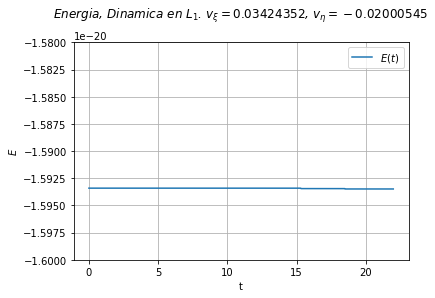

In [219]:
plt.plot(t, En_flor, label = "$E(t)$")
plt.ylim(-1.6e-20,-1.58e-20,)
plt.title("Energia, Dinamica en $L_1$. $v_{\\xi}=0.03424352$, $v_{\\eta} = -0.02000545$\n", fontstyle = "italic", fontsize = 12)
plt.ylabel("$E$")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.savefig("e_.png")

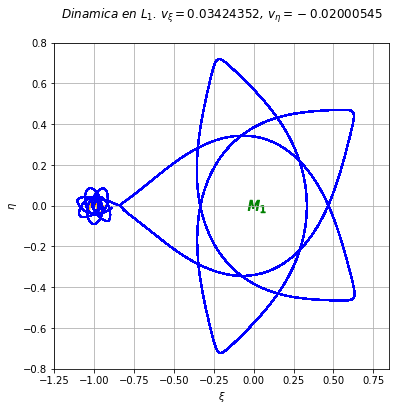

In [206]:
fig = plt.figure(figsize=(6,6))
plt.scatter(e1, 0, marker = "$M_1$", s = 300, color = "green")
plt.scatter(e2, 0, marker = "$M_2$", s = 300, color = "orange")
plt.title("Dinamica en $L_1$. $v_{\\xi}=0.03424352$, $v_{\\eta} = -0.02000545$\n", fontstyle = "italic", fontsize = 12)
plt.ylabel("$\\eta$")
plt.xlabel("$\\xi$")
plt.ylim(-0.8,0.8)
plt.xlim(-1.25,0.85)
plt.grid()

def animate(i):
  plt.plot(e_pos[:i*20],n_pos[:i*20], color = "blue")
  return 

ani = pltani.FuncAnimation(fig, animate, frames = 300, interval = 100)
HTML(ani.to_html5_video())

#**REFERENCIAS**



*   Enrique Pazos [Canal de Youtube]. Videos 29-31. https://www.youtube.com/user/zetacygnus
*   Aguilar. L. A. (2007). Puntos de Lagrange. Instituto de Astronomía, Universidad Nacional Autonoma de Mexico. https://www.astrosen.unam.mx/~aguilar/MySite/Teaching_files/Puntos_de_Lagrange.pdf


